In [17]:
# @title IMPORTING LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

In [18]:
# @title LOADING DATASET
df=pd.read_csv('/content/Unemployment in India.csv')

In [19]:
df.head()    #checking top 5 entries.

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [20]:
df.shape  #checking no of rows and columns in dataset
# so we have 768 rows and 7 columns

(768, 7)

In [21]:
# checking data types and null values
df.info()    # we have 4 categorical columns and 3 numerical columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [22]:
#checking number of null values
df.isnull().sum()   # we have 28 null values in respective columns.

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [23]:
# dropping null values as null values consists only 3% of data hence dropping them.
df.dropna(inplace=True)

In [24]:
df.shape  #successfully dropped the null values

(740, 7)

In [25]:
# doing basic statistic of numerical columns
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [26]:
df.describe(include='object')

,Region,Date,Frequency,Area
count,740,740,740,740
unique,28,14,2,2
top,Andhra Pradesh,31-10-2019,Monthly,Urban
freq,28,55,381,381


In [27]:
df.columns  #checking columns names.

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')

In [35]:
#checking duplicate data
df.duplicated().sum()  #we have 0 duplicate records

0

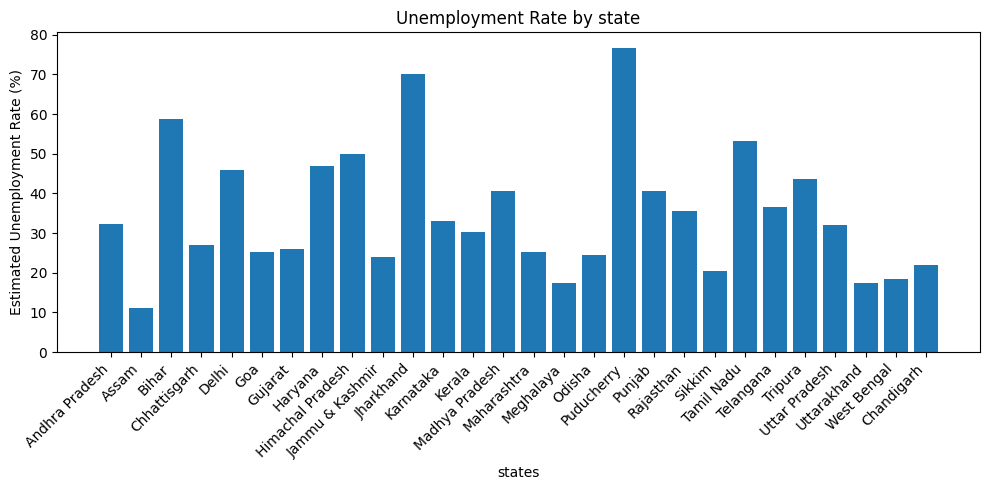

In [47]:
# @title DATA VISUALIZATION
plt.figure(figsize=(10,5))
plt.bar(x=df['Region'], height=df[' Estimated Unemployment Rate (%)'])
plt.xlabel('states')
plt.ylabel('Estimated Unemployment Rate (%)')
plt.title('Unemployment Rate by state')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability if needed
plt.tight_layout()  # Adjust layout for better spacing
plt.show()

In [59]:
# we can also use plotly express library to showcase above graph in more detail form.
fig = px.bar(df, x = "Region", y = " Estimated Unemployment Rate (%)", color = "Region", title = "Average unemploment Rate in each state")
fig.update_layout(xaxis = {'categoryorder':'total descending'})
fig.show()
# as we observed Tripura has highest unemployement rate &  sikkim has lowest unemployement rate

In [60]:
fig = px.bar(df, x = "Region", y = " Estimated Employed", color = "Region", title = " average of People employed in each state")
fig.update_layout(xaxis = {'categoryorder':'total ascending'})
# we have highest employement in uttar pradesh & lowest employement in sikkim


<Figure size 500x500 with 0 Axes>

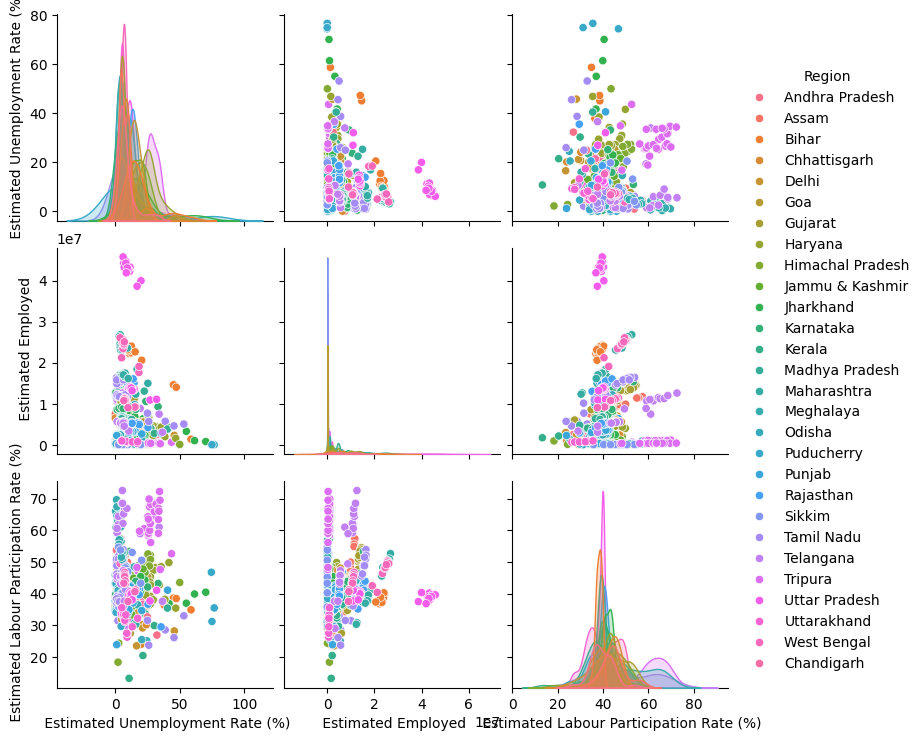

In [75]:
plt.figure(figsize=(5,5))  # pair plot shows relation between columns.

sns.pairplot(df , hue='Region')


In [82]:
unemployment = df[["Region", "Area", " Estimated Unemployment Rate (%)", " Estimated Employed", " Estimated Labour Participation Rate (%)"]]
unemployment = unemployment.groupby(["Area", "Region"])[" Estimated Unemployment Rate (%)"].mean().reset_index()
fig = px.sunburst(unemployment, path=["Area", "Region"], values = " Estimated Unemployment Rate (%)", title='Unemployment rate in each State and Area',height=850)
fig.show()

<Axes: >

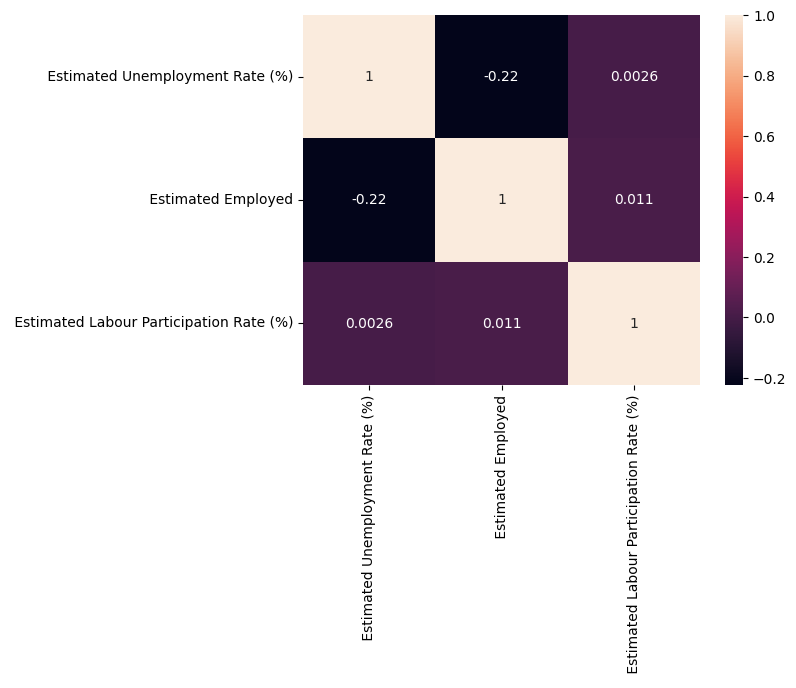

In [83]:
sns.heatmap(df[[' Estimated Unemployment Rate (%)',' Estimated Employed',' Estimated Labour Participation Rate (%)']].corr(),annot=True)

In [86]:
# @title * AVERAGE UNEMPLOYEMENT OVER TIME *
avg_unemployement_over_time = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=True).reset_index()
avg_unemployement_over_time
# we can observe increase in unemployemnt over time.

,Date,Estimated Unemployment Rate (%)
0,31-05-2019,8.874259
1,31-07-2019,9.033889
2,30-09-2019,9.051731
3,30-06-2019,9.303333
4,31-12-2019,9.497358
5,31-08-2019,9.637925
6,30-11-2019,9.868364
7,31-10-2019,9.900909
8,31-01-2020,9.950755
9,29-02-2020,9.964717


In [90]:
# @title * AVERAGE EMPLOYEMENT OVER TIME *
avg_employement_over_time = df.groupby(' Date')[' Estimated Employed'].mean().sort_values(ascending=False).reset_index()
avg_employement_over_time
# slight Decrease in employement over time.

,Date,Estimated Employed
0,30-09-2019,7.739464e+06
1,31-01-2020,7.677344e+06
2,29-02-2020,7.603996e+06
3,31-08-2019,7.539815e+06
4,31-03-2020,7.516581e+06
5,31-05-2019,7.410148e+06
6,31-07-2019,7.404425e+06
7,30-06-2020,7.387009e+06
8,31-12-2019,7.377388e+06
9,30-06-2019,7.358642e+06


In [92]:
# @title * AVERAGE UNEMPLOYEMENT BY REGION *
avg_unemployement_by_region = df.groupby('Region')[' Estimated Unemployment Rate (%)'].mean().sort_values(ascending=True).reset_index()
avg_unemployement_by_region
# meghalaya has lowest unemployement rate
# tripura has highest unemployement rate


,Region,Estimated Unemployment Rate (%)
0,Meghalaya,4.798889
1,Odisha,5.657857
2,Assam,6.428077
3,Uttarakhand,6.582963
4,Gujarat,6.663929
5,Karnataka,6.676071
6,Sikkim,7.249412
7,Madhya Pradesh,7.406429
8,Andhra Pradesh,7.477143
9,Maharashtra,7.557500


In [94]:
# @title AVERAGE PEOPLE EMPLOYED BY REGION
avg_people_employed_over_region = df.groupby('Region')[' Estimated Employed'].mean().sort_values(ascending=False).reset_index()
avg_people_employed_over_region
# uttar pradesh has highest estimated employment & sikkim has the lowest

,Region,Estimated Employed
0,Uttar Pradesh,2.809483e+07
1,Maharashtra,1.999020e+07
2,West Bengal,1.719854e+07
3,Bihar,1.236619e+07
4,Tamil Nadu,1.226955e+07
5,Gujarat,1.140201e+07
6,Madhya Pradesh,1.111548e+07
7,Karnataka,1.066712e+07
8,Rajasthan,1.004106e+07
9,Andhra Pradesh,8.154093e+06


In [95]:
# @title AVERAGE LABOUR PARTICIPATION RATE BY REGION
avg_labour_part_rate_over_region = df.groupby('Region')[' Estimated Labour Participation Rate (%)'].mean().sort_values(ascending=False).reset_index()
avg_labour_part_rate_over_region
# tripura has highest estimated labour participation rate & uttarakhand has lowest estimated labour participation rate.

,Region,Estimated Labour Participation Rate (%)
0,Tripura,61.823929
1,Meghalaya,57.080741
2,Telangana,53.002500
3,Gujarat,46.101071
4,Sikkim,46.070000
5,West Bengal,45.417500
6,Assam,44.868462
7,Himachal Pradesh,44.222143
8,Chhattisgarh,42.810714
9,Haryana,42.737143


In [99]:
# @title HIGHEST UNEMPLOYEMENT RATE BY MONTH
highest_unemployement_rate_by_month = df.groupby(' Date')[' Estimated Unemployment Rate (%)'].max().sort_values(ascending=True).reset_index()
highest_unemployement_rate_by_month

,Date,Estimated Unemployment Rate (%)
0,31-07-2019,25.81
1,30-06-2019,26.64
2,30-11-2019,27.27
3,31-10-2019,27.54
4,31-03-2020,31.61
5,31-08-2019,33.45
6,31-12-2019,33.48
7,30-09-2019,33.57
8,29-02-2020,33.88
9,31-01-2020,34.37
